# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wisnu Al Hussaeni
- **Email:** minasan763@gmail.com
- **ID Dicoding:** wisnu154

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling sering dibeli?
2. Metode pembayaran apa yang paling sering digunakan?
3. Kategori produk apa yang memiliki tingkat kepuasan pelanggan tertinggi berdasarkan ulasan?
4. Kota mana yang memiliki jumlah transaksi terbanyak?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# load dataset
cs = pd.read_csv('/content/customers_dataset.csv')
geo = pd.read_csv('/content/customers_dataset.csv')
items = pd.read_csv('/content/order_items_dataset.csv')
pay = pd.read_csv('/content/order_payments_dataset.csv')
review = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
prod_cat = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

In [ ]:
datasets = [cs, geo, items, pay, review, orders, prod_cat, products, sellers]
for i in datasets:
  print('\n', i.head())


                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  

### Assessing Data

In [ ]:
for i in datasets:
  print('\n', i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state      

In [ ]:
for i in datasets:
  print('\n', i.describe())


        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

        order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max       

In [ ]:
for i in datasets:
  print('\n', i.isnull().sum())


 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 order_id                            0
customer_id                         0
order_statu

In [ ]:
print('cs: ', cs.duplicated().sum())
print('geo: ', geo.duplicated().sum())
print('items: ', items.duplicated().sum())
print('pay: ', pay.duplicated().sum())
print('review: ', review.duplicated().sum())
print('orders: ', orders.duplicated().sum())
print('prod_cat: ', prod_cat.duplicated().sum())
print('products: ', products.duplicated().sum())
print('sellers: ', sellers.duplicated().sum())

cs:  0
geo:  0
items:  0
pay:  0
review:  0
orders:  0
prod_cat:  0
products:  0
sellers:  0


### Cleaning Data

In [ ]:
# mengatasi missing value pada order dataset
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'], inplace=True)

<ipython-input-57-b896533b8e05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
<ipython-input-57-b896533b8e05>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
# mengatasi missing value di product dataset
products.dropna(subset=['product_category_name'], inplace=True)
products.dropna(inplace=True)

In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [ ]:
# mengatasi missing value di seller dataset
sellers.dropna(inplace=True)

# mengatasi missing value di customer dataset
cs.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# menggabungkan data yang relevant
orders_items = pd.merge(orders, items, on='order_id', how='inner')
orders_items_products = pd.merge(orders_items, products, on='product_id', how='inner')
complete_df = pd.merge(orders_items_products, pay, on='order_id', how='inner')

# menggabungkan customer data untuk mendapatkan customer city
complete_df = pd.merge(complete_df, cs[['customer_id', 'customer_city']], on='customer_id', how='inner')
complete_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,1,boleto,1,141.46,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,1,credit_card,3,179.12,vianopolis


## Visualization & Explanatory Analysis

### Pertanyaan 1:

ID product yang sering dibeli: aca2eb7d00ea1a7b8ebd4e68314663af
product yang sering dibeli: moveis_decoracao



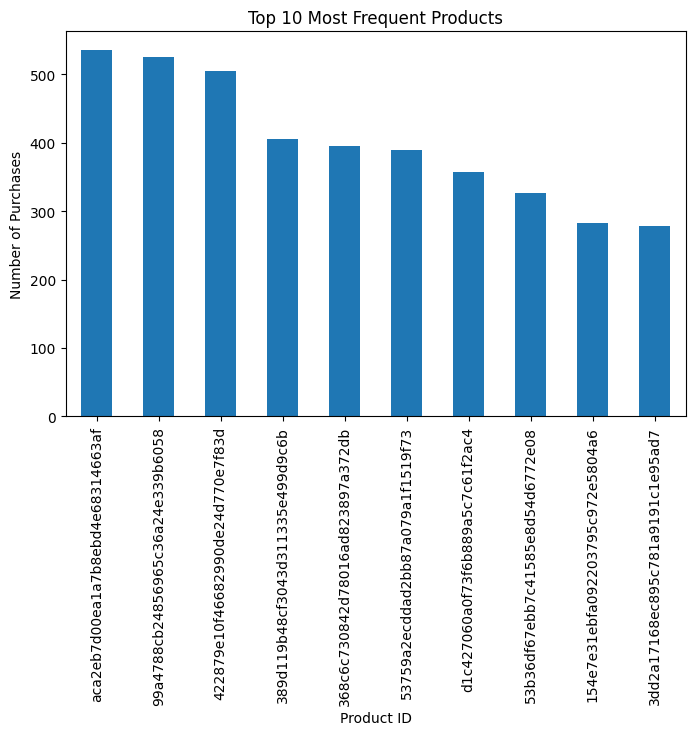

In [ ]:
# Pertanyaan 1 -> Produk apa yang paling sering dibeli?
product_counts = complete_df['product_id'].value_counts()
most_frequent_product = product_counts.index[0]
print(f"ID product yang sering dibeli: {most_frequent_product}")

# product yang sering dibeli
product_name = products[products['product_id'] == most_frequent_product]['product_category_name'].values[0]
print(f"product yang sering dibeli: {product_name}\n")

# visualisai nama produk yang most berdasarkan frequent product
plt.figure(figsize=(8, 5))
product_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.show()

### Pertanyaan 2:

Metode pembayaran yang paling sering digunakan: credit_card



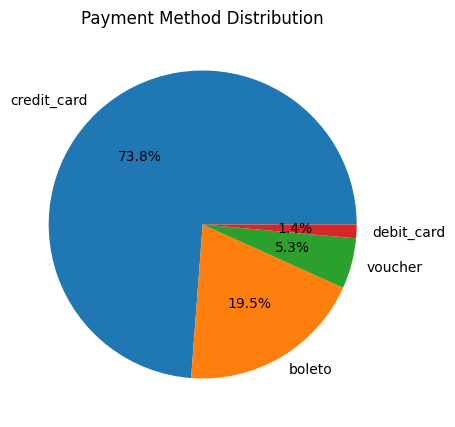

In [ ]:
# Pertanyaan 2 -> Metode pembayaran apa yang paling sering digunakan?
payment_counts = complete_df['payment_type'].value_counts()
most_frequent_payment = payment_counts.index[0]
print(f"Metode pembayaran yang paling sering digunakan: {most_frequent_payment}\n")

# visualisasi metode pembayaran yang paling sering digunakan
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

### Pertanyaan 3

Kategori produk dengan tingkat kepuasan tertinggi: cds_dvds_musicais



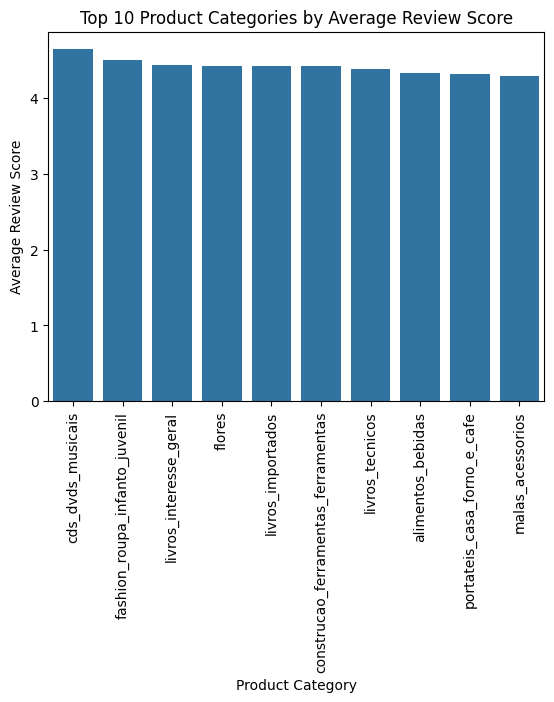

In [ ]:
# Pertanyaan 3 -> Kategori produk apa yang memiliki tingkat kepuasan pelanggan tertinggi berdasarkan ulasan?
merged_review = pd.merge(complete_df, review, on='order_id', how='left')
category_satisfaction = merged_review.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
highest_satisfaction_category = category_satisfaction.index[0]
print(f"Kategori produk dengan tingkat kepuasan tertinggi: {highest_satisfaction_category}\n")

# visualisai
sns.barplot(x=category_satisfaction.index[:10], y=category_satisfaction.values[:10])
plt.title('Top 10 Product Categories by Average Review Score')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 4

Kota dengan transaksi terbanyak: sao paulo



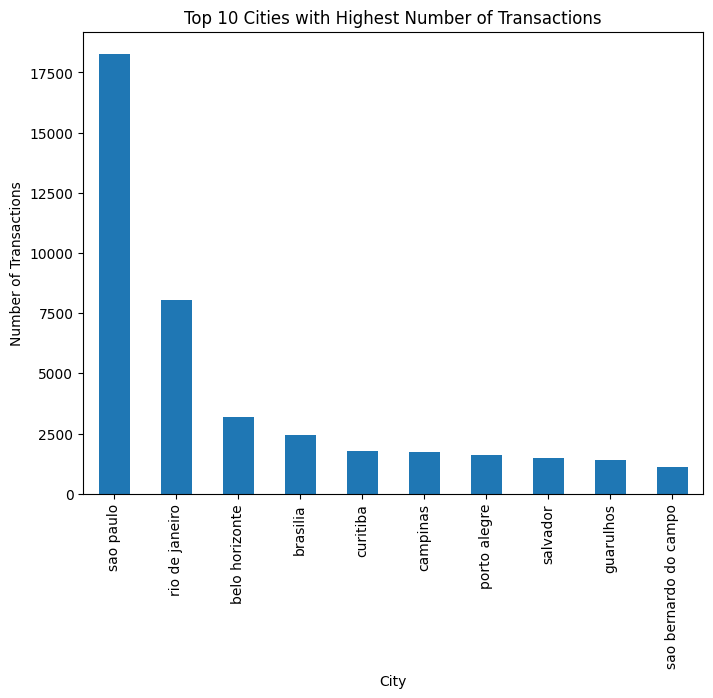

In [ ]:
# Pertanyaan -> Kota mana yang memiliki jumlah transaksi terbanyak?
city_transactions = complete_df['customer_city'].value_counts()
city_with_most_transactions = city_transactions.idxmax()
print(f"Kota dengan transaksi terbanyak: {city_with_most_transactions}\n")

# visualisasi kota yang memiliki jumlah transaksi terbanyak
plt.figure(figsize=(8, 6))
city_transactions.head(10).plot(kind='bar')
plt.title('Top 10 Cities with Highest Number of Transactions')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()